## House Prices Multi-Task Learning

### Steps
1. **Data Exploration and Preprocessing:** Understand your data. Handle missing values, encode categorical variables, and normalize numerical variables.
2. **Multi-task Model Building:** Use PyTorch Lightning to build a feed-forward neural network model that predicts both house prices (a regression task) and house category (a classification task). This requires a shared bottom model and task-specific top layers.
3. **Activation Functions and Optimizers:** Experiment with various activation functions and optimizers. Compare their effects on the performance of your model.
4. **Loss Functions:** Implement and use appropriate loss functions for both tasks. Combine these into a single loss function for training your multi-task model.
5. **Model Evaluation:** Use suitable metrics to evaluate the performance of your model on both tasks.
6. **Advanced PyTorch Lightning Features:** Use PyTorch Lightning's features like logging, callback system, and Trainer API to effectively manage your project.
7. **Hyperparameter Tuning:** Use PyTorch Lightning's integration with Optuna for hyperparameter optimization.
8. **Report:** Write a comprehensive report detailing your approach, experiments, and results.

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer

pd.set_option("display.max_columns", 999)

### Read Data

In [31]:
df_og = pd.read_csv("Datasets/train.csv")
df = df_og.copy()
df["MSSubClass"] = df["MSSubClass"].astype("str")
df.drop(["MoSold", "YrSold", "SaleType", "SaleCondition"], axis = 1, inplace = True)

print("Data First Look", df.shape)
display(df.head(10))
display(df.columns)
display(df.describe())

Data First Look (1460, 77)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,Y,SBrkr,1077,0,0,1077,1,0,1,0,2,2,TA,5,Typ,2,TA,Attchd,1939.0,RFn,1,205,Gd,TA,Y,0,4,0,0,0,0,NaN,NaN,NaN,0,118000


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890
std,421.610009,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883
min,1.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,365.750000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,730.500000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000
75%,1095.250000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
max,1460.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000


### Correlation Heatmap

/var/folders/p1/pm0sdphs6hg08b36xt9g88ch0000gn/T/ipykernel_73937/1951964119.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  hm = sns.heatmap(df.loc[:, df.columns!= "Id"].corr(),


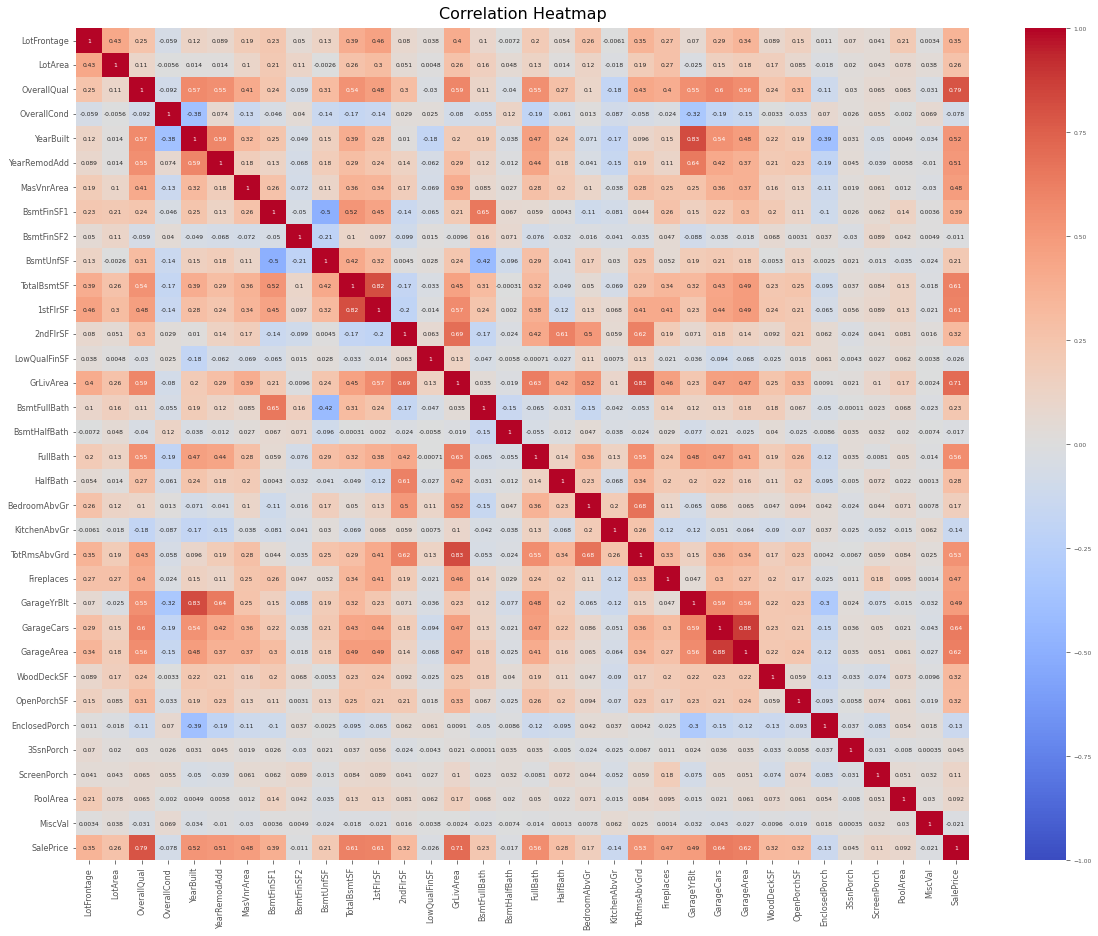

In [32]:
plt.style.use("ggplot")
plt.figure(figsize=(20, 15), dpi = 72)
hm = sns.heatmap(df.loc[:, df.columns!= "Id"].corr(), 
                 vmin = -1, vmax = 1, 
                 annot = True, annot_kws={"fontsize": 6},
                 cmap = "coolwarm")
hm.set_title("Correlation Heatmap", fontdict={'fontsize': 16}, pad = 10)
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8) 
plt.show()

### Drop High Correlated Columns

In [33]:
df.drop(["GarageCars", "GarageYrBlt"], axis = 1, inplace = True)

### Distribution of Target Price

array([[<Axes: title={'center': 'SalePrice'}>]], dtype=object)

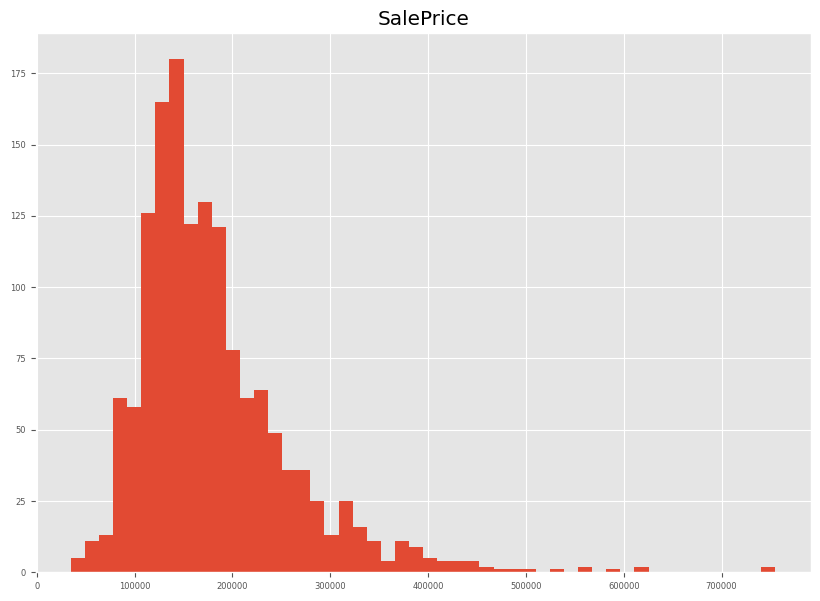

In [34]:
df[["SalePrice"]].hist(bins=50, figsize=(10, 7))

### Distribution of Numerical Variables

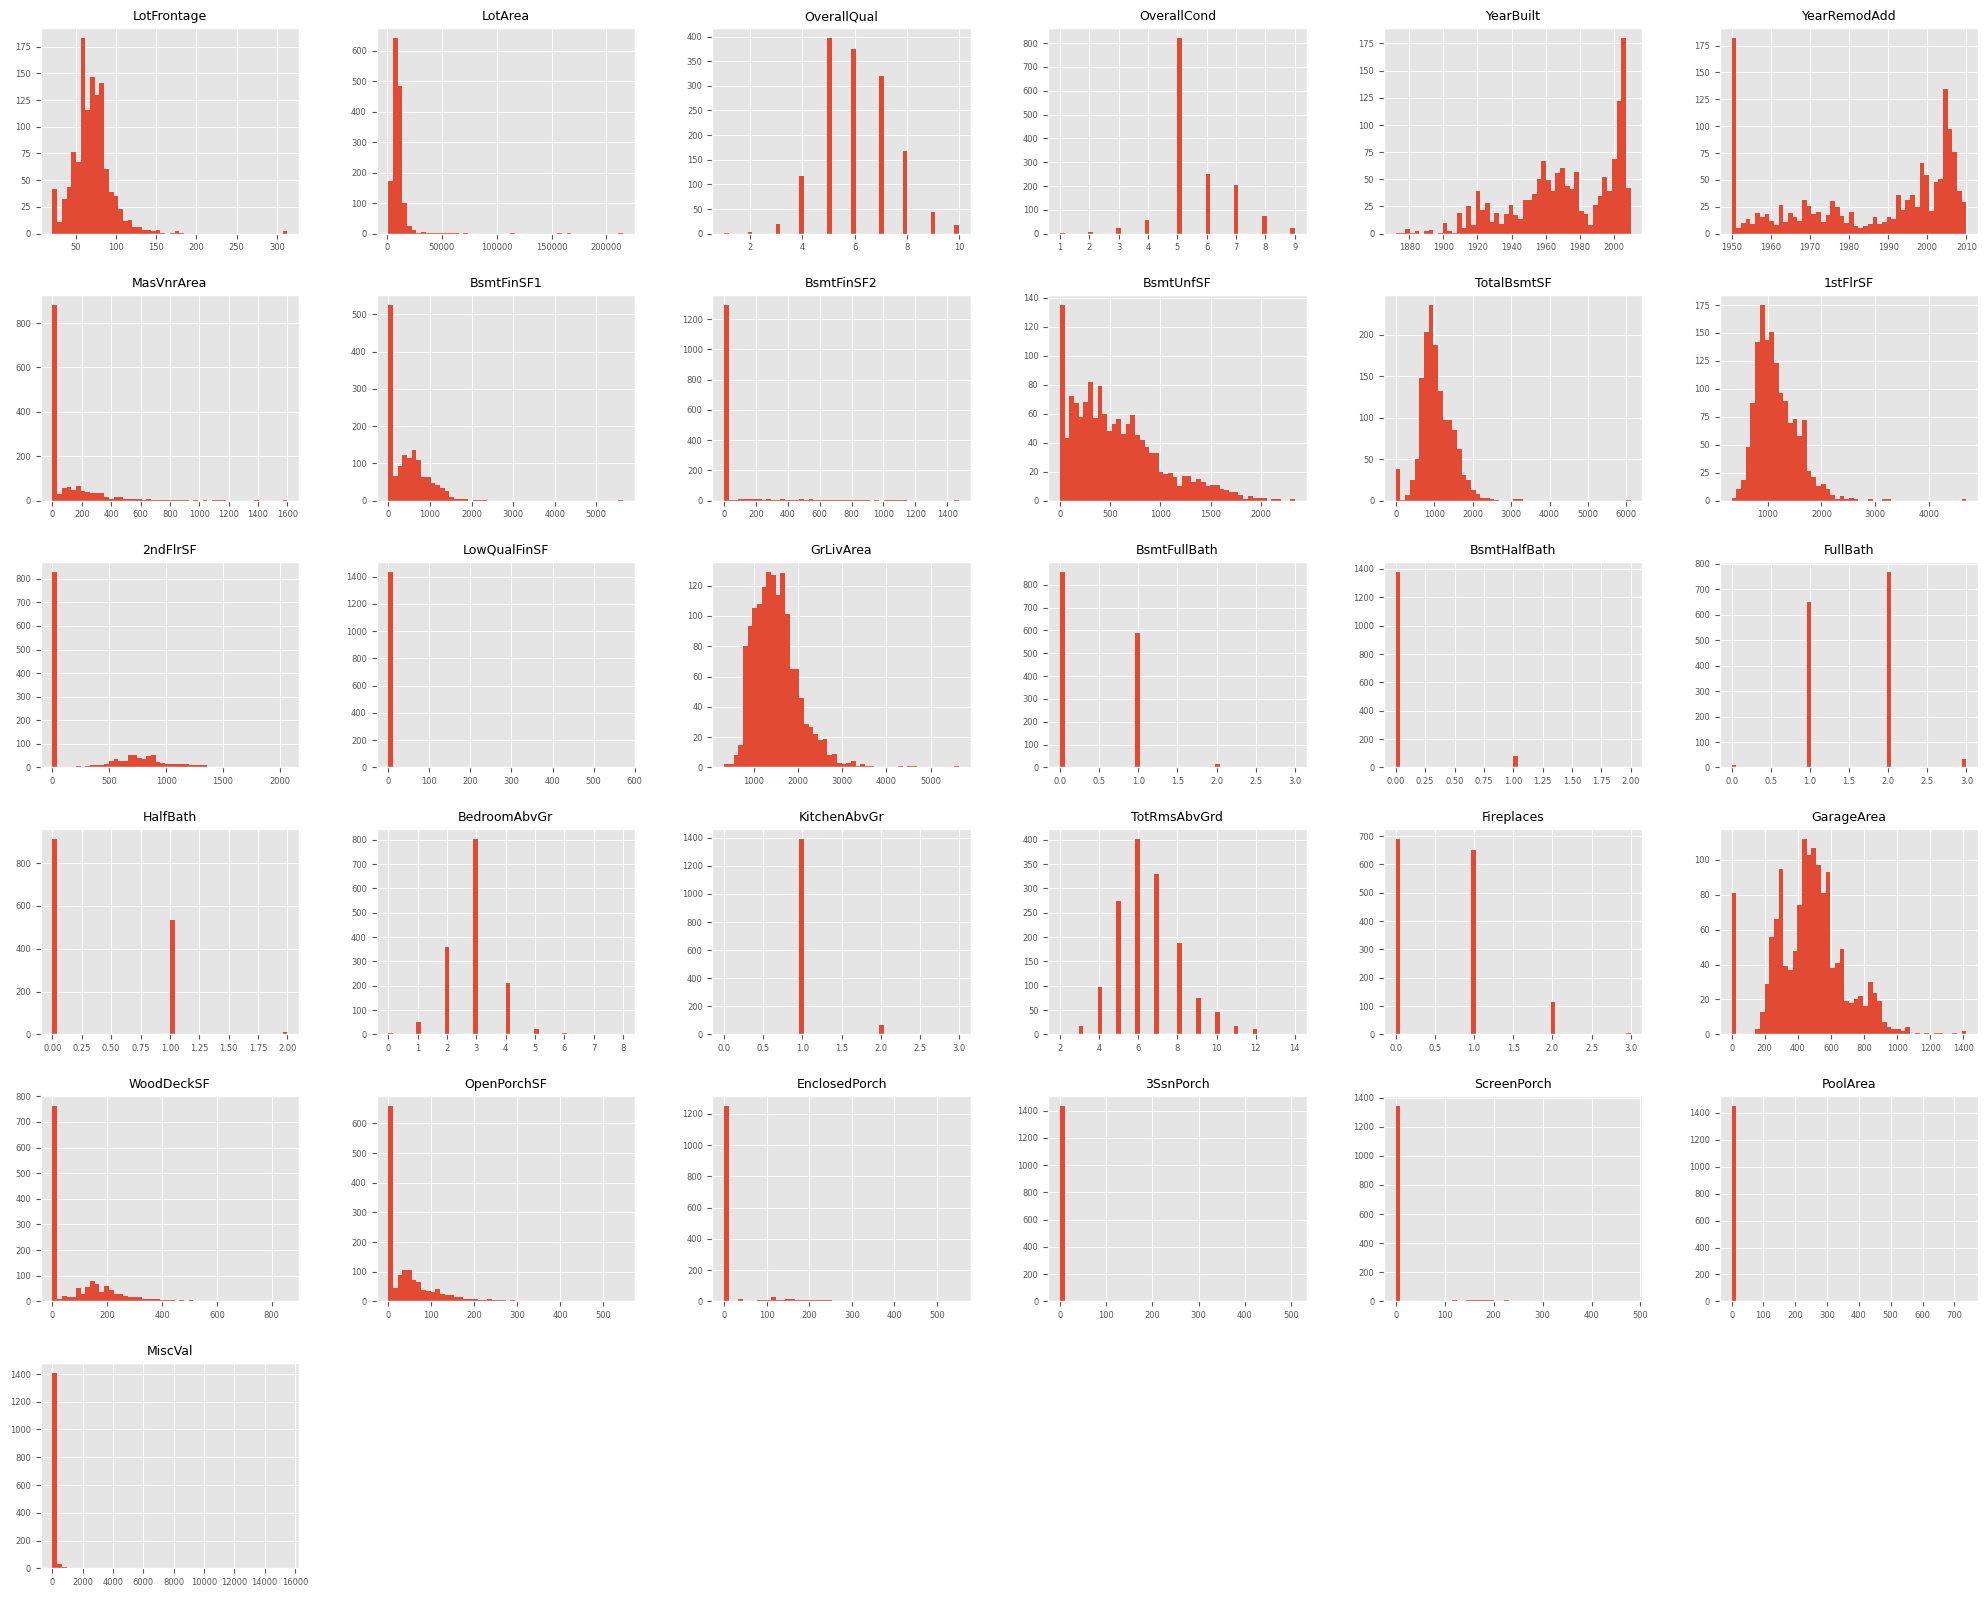

In [35]:
plt.rc('font', size=8)
plt.rc('axes', labelsize=8, titlesize=9)
plt.rc('legend', fontsize=8)
plt.rc('xtick', labelsize=6)
plt.rc('ytick', labelsize=6)

df.loc[:, ~df.columns.isin(["Id","SalePrice"])].hist(bins=50, figsize=(25, 20))
plt.show()

### Year to Age
YearBuilt, YearRemodAdd

In [36]:
df["HouseAge"] = df["YearBuilt"].apply(lambda x: 2023 - int(x))
df["RemodAge"] = df["YearRemodAdd"].apply(lambda x: 2023 - int(x))

In [37]:
#df[["HouseStyle", "BldgType", "YearBuilt", "YearRemodAdd"]].value_counts()
def getHouseCat(row):
    h_dict = {"1Story": "Single",
              "1.5Fin": "Single",
              "1.5Unf": "Single",
              "2Story": "Multi",
              "2.5Fin": "Multi",
              "2.5Unf": "Multi",
              "SFoyer": "Multi",
              "SLvl": "Multi"}
    b_dict = {"1Fam": "Fam",
              "2FmCon": "Fam",
              "2fmCon": "Fam",
              "Duplex": "Other",
              "TwnhsE": "Other",
              "TwnhsI": "Other",
              "Twnhs": "Other"}
    h = h_dict[row["HouseStyle"]]
    b = b_dict[row["BldgType"]]
    y = "Old" if row["YearBuilt"] < 1930 else "New"
    rmd = "NoRmd" if row["YearBuilt"] == row["YearRemodAdd"] else "Rmd"
    if y == "Old":
        return "Other"
    elif b == "Other":
        return "Other"
    else:
        return h+"_"+rmd

df["HouseCat"] = df.apply(lambda row: getHouseCat(row), axis = 1)
df.drop(["HouseStyle", "BldgType", "YearBuilt", "YearRemodAdd"], axis = 1, inplace = True)
display(pd.DataFrame(df["HouseCat"].value_counts()).reset_index().rename(columns={"index": "HouseCat", "HouseCat": "Count"}))
N_CAT = len(df["HouseCat"].unique())
print("N_CAT =", N_CAT)

,HouseCat,Count
0,Other,393
1,Single_NoRmd,360
2,Single_Rmd,309
3,Multi_NoRmd,246
4,Multi_Rmd,152


N_CAT = 5


### Segregate targets

In [38]:
target_price = df.SalePrice.copy()
target_house_cat = df.HouseCat.copy()
target_house_cat = pd.Series(LabelEncoder().fit_transform(target_house_cat))
df.drop(["Id", "SalePrice", "HouseCat"], axis = 1, inplace = True)

### Redefine NA

In [39]:
cols_with_NA_cat = ["Alley", "GarageType", "Fence", "MiscFeature"]
cols_with_NA_rank = ["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageFinish", "GarageQual", "GarageCond", "PoolQC"]

In [40]:
for col in cols_with_NA_cat:
    df[col] = df[col].fillna("No")

In [41]:
na_summary = pd.DataFrame(df.isna().sum()).rename(columns = {0: "NA_Count"})
print("Below NAs will be handled by (1) imputation or (2) customized transformers in later sections.")
display(na_summary[na_summary.NA_Count != 0])

Below NAs will be handled by (1) imputation or (2) customized transformers in later sections.


,NA_Count
LotFrontage,259
MasVnrType,8
MasVnrArea,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1
FireplaceQu,690


### Transformers for numerical and categorical variables

In [42]:
num_pipeline = make_pipeline(SimpleImputer(strategy="median"), 
                             StandardScaler())

cat_pipeline = make_pipeline(SimpleImputer(strategy = "most_frequent"),
                             OneHotEncoder(handle_unknown = "ignore"))

### Customize transformers for ranking variables

In [43]:
for col in cols_with_NA_rank:
    print(col, df[col].unique().tolist())

ordinal_cat = {}
ordinal_cat["BsmtQual"] = [np.nan, "Po", "Fa", "TA", "Gd", "Ex"]
ordinal_cat["BsmtCond"] =  [np.nan, "Po", "Fa", "TA", "Gd", "Ex"]
ordinal_cat["BsmtExposure"] = [np.nan, "No", "Mn", "Av", "Gd"]
ordinal_cat["BsmtFinType1"] = [np.nan, "Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"]
ordinal_cat["BsmtFinType2"] = [np.nan, "Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"]
ordinal_cat["FireplaceQu"] = [np.nan, "Po", "Fa", "TA", "Gd", "Ex"]
ordinal_cat["GarageFinish"] = [np.nan, "Unf", "RFn", "Fin"]
ordinal_cat["GarageQual"] = [np.nan, "Po", "Fa", "TA", "Gd", "Ex"]
ordinal_cat["GarageCond"] = [np.nan, "Po", "Fa", "TA", "Gd", "Ex"]
ordinal_cat["PoolQC"] = [np.nan, "Fa", "TA", "Gd", "Ex"]

rank_pipelines = {}
for col in cols_with_NA_rank:
    rank_pipelines[col] = make_pipeline(OrdinalEncoder(categories = [ordinal_cat[col]], handle_unknown = "use_encoded_value", unknown_value = np.nan),
                                        MinMaxScaler(),
                                        SimpleImputer(strategy = "constant", fill_value = 0)
                                        )


BsmtQual ['Gd', 'TA', 'Ex', nan, 'Fa']
BsmtCond ['TA', 'Gd', nan, 'Fa', 'Po']
BsmtExposure ['No', 'Gd', 'Mn', 'Av', nan]
BsmtFinType1 ['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ']
BsmtFinType2 ['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ']
FireplaceQu [nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po']
GarageFinish ['RFn', 'Unf', 'Fin', nan]
GarageQual ['TA', 'Fa', 'Gd', nan, 'Ex', 'Po']
GarageCond ['TA', 'Fa', nan, 'Gd', 'Po', 'Ex']
PoolQC [nan, 'Ex', 'Fa', 'Gd']


In [44]:
num_attr = df.select_dtypes(include=[np.number]).columns
cat_attr =[]
for col in df.columns:
    if (col not in num_attr) & (col not in cols_with_NA_rank):
        cat_attr.append(col)

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attr),
    ("cat", cat_pipeline, cat_attr),
    ("rank_BsmtQual", rank_pipelines["BsmtQual"], ["BsmtQual"]),
    ("rank_BsmtCond", rank_pipelines["BsmtCond"], ["BsmtCond"]),
    ("rank_BsmtExposure", rank_pipelines["BsmtExposure"], ["BsmtExposure"]),
    ("rank_BsmtFinType1", rank_pipelines["BsmtFinType1"], ["BsmtFinType1"]),
    ("rank_BsmtFinType2", rank_pipelines["BsmtFinType2"], ["BsmtFinType2"]),
    ("rank_FireplaceQu", rank_pipelines["FireplaceQu"], ["FireplaceQu"]),
    ("rank_GarageFinish", rank_pipelines["GarageFinish"], ["GarageFinish"]),
    ("rank_GarageQual", rank_pipelines["GarageQual"], ["GarageQual"]),
    ("rank_GarageCond", rank_pipelines["GarageCond"], ["GarageCond"]),
    ("rank_PoolQC", rank_pipelines["PoolQC"], ["PoolQC"])],
    remainder = "passthrough")

In [45]:
df_prep = pd.DataFrame(preprocessing.fit_transform(df).toarray(), columns = preprocessing.get_feature_names_out())
display(df_prep.head(10))

,num__LotFrontage,num__LotArea,num__OverallQual,num__OverallCond,num__MasVnrArea,num__BsmtFinSF1,num__BsmtFinSF2,num__BsmtUnfSF,num__TotalBsmtSF,num__1stFlrSF,num__2ndFlrSF,num__LowQualFinSF,num__GrLivArea,num__BsmtFullBath,num__BsmtHalfBath,num__FullBath,num__HalfBath,num__BedroomAbvGr,num__KitchenAbvGr,num__TotRmsAbvGrd,num__Fireplaces,num__GarageArea,num__WoodDeckSF,num__OpenPorchSF,num__EnclosedPorch,num__3SsnPorch,num__ScreenPorch,num__PoolArea,num__MiscVal,num__HouseAge,num__RemodAge,cat__MSSubClass_120,cat__MSSubClass_160,cat__MSSubClass_180,cat__MSSubClass_190,cat__MSSubClass_20,cat__MSSubClass_30,cat__MSSubClass_40,cat__MSSubClass_45,cat__MSSubClass_50,cat__MSSubClass_60,cat__MSSubClass_70,cat__MSSubClass_75,cat__MSSubClass_80,cat__MSSubClass_85,cat__MSSubClass_90,cat__MSZoning_C (all),cat__MSZoning_FV,cat__MSZoning_RH,cat__MSZoning_RL,cat__MSZoning_RM,cat__Street_Grvl,cat__Street_Pave,cat__Alley_Grvl,cat__Alley_No,cat__Alley_Pave,cat__LotShape_IR1,cat__LotShape_IR2,cat__LotShape_IR3,cat__LotShape_Reg,cat__LandContour_Bnk,cat__LandContour_HLS,cat__LandContour_Low,cat__LandContour_Lvl,cat__Utilities_AllPub,cat__Utilities_NoSeWa,cat__LotConfig_Corner,cat__LotConfig_CulDSac,cat__LotConfig_FR2,cat__LotConfig_FR3,cat__LotConfig_Inside,cat__LandSlope_Gtl,cat__LandSlope_Mod,cat__LandSlope_Sev,cat__Neighborhood_Blmngtn,cat__Neighborhood_Blueste,cat__Neighborhood_BrDale,cat__Neighborhood_BrkSide,cat__Neighborhood_ClearCr,cat__Neighborhood_CollgCr,cat__Neighborhood_Crawfor,cat__Neighborhood_Edwards,cat__Neighborhood_Gilbert,cat__Neighborhood_IDOTRR,cat__Neighborhood_MeadowV,cat__Neighborhood_Mitchel,cat__Neighborhood_NAmes,cat__Neighborhood_NPkVill,cat__Neighborhood_NWAmes,cat__Neighborhood_NoRidge,cat__Neighborhood_NridgHt,cat__Neighborhood_OldTown,cat__Neighborhood_SWISU,cat__Neighborhood_Sawyer,cat__Neighborhood_SawyerW,cat__Neighborhood_Somerst,cat__Neighborhood_StoneBr,cat__Neighborhood_Timber,cat__Neighborhood_Veenker,cat__Condition1_Artery,cat__Condition1_Feedr,cat__Condition1_Norm,cat__Condition1_PosA,cat__Condition1_PosN,cat__Condition1_RRAe,cat__Condition1_RRAn,cat__Condition1_RRNe,cat__Condition1_RRNn,cat__Condition2_Artery,cat__Condition2_Feedr,cat__Condition2_Norm,cat__Condition2_PosA,cat__Condition2_PosN,cat__Condition2_RRAe,cat__Condition2_RRAn,cat__Condition2_RRNn,cat__RoofStyle_Flat,cat__RoofStyle_Gable,cat__RoofStyle_Gambrel,cat__RoofStyle_Hip,cat__RoofStyle_Mansard,cat__RoofStyle_Shed,cat__RoofMatl_ClyTile,cat__RoofMatl_CompShg,cat__RoofMatl_Membran,cat__RoofMatl_Metal,cat__RoofMatl_Roll,cat__RoofMatl_Tar&Grv,cat__RoofMatl_WdShake,cat__RoofMatl_WdShngl,cat__Exterior1st_AsbShng,cat__Exterior1st_AsphShn,cat__Exterior1st_BrkComm,cat__Exterior1st_BrkFace,cat__Exterior1st_CBlock,cat__Exterior1st_CemntBd,cat__Exterior1st_HdBoard,cat__Exterior1st_ImStucc,cat__Exterior1st_MetalSd,cat__Exterior1st_Plywood,cat__Exterior1st_Stone,cat__Exterior1st_Stucco,cat__Exterior1st_VinylSd,cat__Exterior1st_Wd Sdng,cat__Exterior1st_WdShing,cat__Exterior2nd_AsbShng,cat__Exterior2nd_AsphShn,cat__Exterior2nd_Brk Cmn,cat__Exterior2nd_BrkFace,cat__Exterior2nd_CBlock,cat__Exterior2nd_CmentBd,cat__Exterior2nd_HdBoard,cat__Exterior2nd_ImStucc,cat__Exterior2nd_MetalSd,cat__Exterior2nd_Other,cat__Exterior2nd_Plywood,cat__Exterior2nd_Stone,cat__Exterior2nd_Stucco,cat__Exterior2nd_VinylSd,cat__Exterior2nd_Wd Sdng,cat__Exterior2nd_Wd Shng,cat__MasVnrType_BrkCmn,cat__MasVnrType_BrkFace,cat__MasVnrType_None,cat__MasVnrType_Stone,cat__ExterQual_Ex,cat__ExterQual_Fa,cat__ExterQual_Gd,cat__ExterQual_TA,cat__ExterCond_Ex,cat__ExterCond_Fa,cat__ExterCond_Gd,cat__ExterCond_Po,cat__ExterCond_TA,cat__Foundation_BrkTil,cat__Foundation_CBlock,cat__Foundation_PConc,cat__Foundation_Slab,cat__Foundation_Stone,cat__Foundation_Wood,cat__Heating_Floor,cat__Heating_GasA,cat__Heating_GasW,cat__Heating_Grav,cat__Heating_OthW,cat__Heating_Wall,cat__HeatingQC_Ex,cat__HeatingQC_Fa,cat__HeatingQC_Gd,cat__HeatingQC_Po,cat__HeatingQC_TA,cat__CentralAir_N,cat__CentralAir_Y

In [46]:
assert df_prep.isna().sum().sum() == 0

print("Preprocessing result:")
print("Original dimension -", df.shape)
print("New dimension -", df_prep.shape)

Preprocessing result:
Original dimension - (1460, 71)
New dimension - (1460, 239)


### Multi-Task Model

In [94]:
import pytorch_lightning as pl
from pytorch_lightning.callbacks import Callback
import torch.nn as nn
import torch.optim as optim

import torch
from torch.nn import functional as F
from torchmetrics import MeanAbsolutePercentageError
from torch.utils.data import Dataset, DataLoader

from sklearn.model_selection import train_test_split


In [100]:
THRESHOLD = 9
P_LOSS = "mape"
LR_ADAM = 0.005
LR_SGD = 0.05

class LitModel_LogsRelu_Adam(pl.LightningModule):
    def __init__(self, N_CAT):
        super().__init__()
        self.layer_1 = torch.nn.Linear(239, 128)
        self.layer_2 = torch.nn.Linear(128, 64)
        self.layer_3 = torch.nn.Linear(64, 32)
        self.layer_hc1 = torch.nn.Linear(32, 16)
        self.layer_hc2 = torch.nn.Linear(16, N_CAT)
        self.layer_p1 = torch.nn.Linear(32, 16)
        self.layer_p2 = torch.nn.Linear(16, 1)
        self.train_epoch_entropy = []
        self.train_epoch_mape = []
        self.val_epoch_entropy = []
        self.val_epoch_mape = []
        self.test_epoch_entropy = []
        self.test_epoch_mape = []

    def forward(self, x):
        x = self.layer_1(x)
        x = F.relu(x)
        x = self.layer_2(x)
        x = F.relu(x)
        x = self.layer_3(x)
        x = F.relu(x)

        x_p = self.layer_p1(x)
        x_p = F.relu(x_p)
        price = self.layer_p2(x_p)

        x_hc = self.layer_hc1(x)
        x_hc = F.relu(x_hc)
        x_hc = self.layer_hc2(x_hc)
        house_cat = F.log_softmax(x_hc, dim = 1)
        return house_cat, price
    
    def training_step(self, batch, batch_idx):
        x, label_hc, label_p = batch
        hc, p = self(x)
        hc_loss = F.cross_entropy(hc, label_hc)
        if P_LOSS == "mape":
            mape = MeanAbsolutePercentageError()
            p_loss = mape(p, label_p.unsqueeze(1))
        elif P_LOSS == "mse":
            p_loss = F.mse_loss(p, label_p.unsqueeze(1))
        elif P_LOSS == "l1":
            p_loss = F.l1_loss(p, label_p.unsqueeze(1))
        else:
            p_loss = F.l1_loss(p, label_p.unsqueeze(1))
        total_loss = hc_loss + p_loss*THRESHOLD
        self.log("train_total_loss", total_loss, on_step=False, on_epoch=True, prog_bar=True, logger=True)
        self.log("train_hc_loss", hc_loss, on_step=False, on_epoch=True, prog_bar=True, logger=True)
        self.log("train_p_loss", p_loss, on_step=False, on_epoch=True, prog_bar=True, logger=True)
        return total_loss
    
    def training_step_end(self, outputs):
        self.metric(outputs['preds'], outputs['target'])
        self.log("metric", self.metric)
    
    def validation_step(self, batch, batch_idx):
        x, label_hc, label_p = batch
        hc, p = self(x)
        hc_loss = F.cross_entropy(hc, label_hc)
        if P_LOSS == "mape":
            mape = MeanAbsolutePercentageError()
            p_loss = mape(p, label_p.unsqueeze(1))
        elif P_LOSS == "mse":
            p_loss = F.mse_loss(p, label_p.unsqueeze(1))
        elif P_LOSS == "l1":
            p_loss = F.l1_loss(p, label_p.unsqueeze(1))
        else:
            p_loss = F.l1_loss(p, label_p.unsqueeze(1))
        total_loss = hc_loss + p_loss*THRESHOLD
        self.log("val_total_loss", total_loss, on_step=False, on_epoch=True, prog_bar=True, logger=True)
        self.log("val_hc_loss", hc_loss, on_step=False, on_epoch=True, prog_bar=True, logger=True)
        self.log("val_p_loss", p_loss, on_step=False, on_epoch=True, prog_bar=True, logger=True)
        return total_loss
    
    def validation_step_end(self, outputs):
        self.metric(outputs['preds'], outputs['target'])
        self.log("metric", self.metric)

    def test_step(self, batch, batch_idx):
        x, label_hc, label_p = batch
        hc, p = self(x)
        hc_loss = F.cross_entropy(hc, label_hc)
        if P_LOSS == "mape":
            mape = MeanAbsolutePercentageError()
            p_loss = mape(p, label_p.unsqueeze(1))
        elif P_LOSS == "mse":
            p_loss = F.mse_loss(p, label_p.unsqueeze(1))
        elif P_LOSS == "l1":
            p_loss = F.l1_loss(p, label_p.unsqueeze(1))
        else:
            p_loss = F.l1_loss(p, label_p.unsqueeze(1))
        total_loss = hc_loss + p_loss*THRESHOLD
        self.log("test_total_loss", total_loss, on_step=False, on_epoch=True, prog_bar=True, logger=True)
        self.log("test_hc_loss", hc_loss, on_step=False, on_epoch=True, prog_bar=True, logger=True)
        self.log("test_p_loss", p_loss, on_step=False, on_epoch=True, prog_bar=True, logger=True)
        return total_loss
    
    def test_step_end(self, outputs):
        self.metric(outputs['preds'], outputs['target'])
        self.log("metric", self.metric)
    
    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=LR_ADAM)

class LitModel_ReluRelu_Adam(pl.LightningModule):
    def __init__(self, N_CAT):
        super().__init__()
        self.layer_1 = torch.nn.Linear(239, 128)
        self.layer_2 = torch.nn.Linear(128, 64)
        self.layer_3 = torch.nn.Linear(64, 32)
        self.layer_hc1 = torch.nn.Linear(32, 16)
        self.layer_hc2 = torch.nn.Linear(16, N_CAT)
        self.layer_p1 = torch.nn.Linear(32, 16)
        self.layer_p2 = torch.nn.Linear(16, 1)
        self.train_epoch_entropy = []
        self.train_epoch_mape = []
        self.val_epoch_entropy = []
        self.val_epoch_mape = []
        self.test_epoch_entropy = []
        self.test_epoch_mape = []

    def forward(self, x):
        x = self.layer_1(x)
        x = F.relu(x)
        x = self.layer_2(x)
        x = F.relu(x)
        x = self.layer_3(x)
        x = F.relu(x)

        x_p = self.layer_p1(x)
        x_p = F.relu(x_p)
        price = self.layer_p2(x_p)

        x_hc = self.layer_hc1(x)
        x_hc = F.relu(x_hc)
        x_hc = self.layer_hc2(x_hc)
        house_cat = F.relu(x_hc)
        return house_cat, price
    
    def training_step(self, batch, batch_idx):
        x, label_hc, label_p = batch
        hc, p = self(x)
        hc_loss = F.cross_entropy(hc, label_hc)
        if P_LOSS == "mape":
            mape = MeanAbsolutePercentageError()
            p_loss = mape(p, label_p.unsqueeze(1))
        elif P_LOSS == "mse":
            p_loss = F.mse_loss(p, label_p.unsqueeze(1))
        elif P_LOSS == "l1":
            p_loss = F.l1_loss(p, label_p.unsqueeze(1))
        else:
            p_loss = F.l1_loss(p, label_p.unsqueeze(1))
        total_loss = hc_loss + p_loss*THRESHOLD
        self.log("train_total_loss", total_loss, on_step=False, on_epoch=True, prog_bar=True, logger=True)
        self.log("train_hc_loss", hc_loss, on_step=False, on_epoch=True, prog_bar=True, logger=True)
        self.log("train_p_loss", p_loss, on_step=False, on_epoch=True, prog_bar=True, logger=True)
        return total_loss
    
    def training_step_end(self, outputs):
        self.metric(outputs['preds'], outputs['target'])
        self.log("metric", self.metric)
    
    def validation_step(self, batch, batch_idx):
        x, label_hc, label_p = batch
        hc, p = self(x)
        hc_loss = F.cross_entropy(hc, label_hc)
        if P_LOSS == "mape":
            mape = MeanAbsolutePercentageError()
            p_loss = mape(p, label_p.unsqueeze(1))
        elif P_LOSS == "mse":
            p_loss = F.mse_loss(p, label_p.unsqueeze(1))
        elif P_LOSS == "l1":
            p_loss = F.l1_loss(p, label_p.unsqueeze(1))
        else:
            p_loss = F.l1_loss(p, label_p.unsqueeze(1))
        total_loss = hc_loss + p_loss*THRESHOLD
        self.log("val_total_loss", total_loss, on_step=False, on_epoch=True, prog_bar=True, logger=True)
        self.log("val_hc_loss", hc_loss, on_step=False, on_epoch=True, prog_bar=True, logger=True)
        self.log("val_p_loss", p_loss, on_step=False, on_epoch=True, prog_bar=True, logger=True)
        return total_loss
    
    def validation_step_end(self, outputs):
        self.metric(outputs['preds'], outputs['target'])
        self.log("metric", self.metric)

    def test_step(self, batch, batch_idx):
        x, label_hc, label_p = batch
        hc, p = self(x)
        hc_loss = F.cross_entropy(hc, label_hc)
        if P_LOSS == "mape":
            mape = MeanAbsolutePercentageError()
            p_loss = mape(p, label_p.unsqueeze(1))
        elif P_LOSS == "mse":
            p_loss = F.mse_loss(p, label_p.unsqueeze(1))
        elif P_LOSS == "l1":
            p_loss = F.l1_loss(p, label_p.unsqueeze(1))
        else:
            p_loss = F.l1_loss(p, label_p.unsqueeze(1))
        total_loss = hc_loss + p_loss*THRESHOLD
        self.log("test_total_loss", total_loss, on_step=False, on_epoch=True, prog_bar=True, logger=True)
        self.log("test_hc_loss", hc_loss, on_step=False, on_epoch=True, prog_bar=True, logger=True)
        self.log("test_p_loss", p_loss, on_step=False, on_epoch=True, prog_bar=True, logger=True)
        return total_loss
    
    def test_step_end(self, outputs):
        self.metric(outputs['preds'], outputs['target'])
        self.log("metric", self.metric)
    
    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=LR_ADAM)

class LitModel_SigmoidRelu_Adam(pl.LightningModule):
    def __init__(self, N_CAT):
        super().__init__()
        self.layer_1 = torch.nn.Linear(239, 128)
        self.layer_2 = torch.nn.Linear(128, 64)
        self.layer_3 = torch.nn.Linear(64, 32)
        self.layer_hc1 = torch.nn.Linear(32, 16)
        self.layer_hc2 = torch.nn.Linear(16, N_CAT)
        self.layer_p1 = torch.nn.Linear(32, 16)
        self.layer_p2 = torch.nn.Linear(16, 1)
        self.train_epoch_entropy = []
        self.train_epoch_mape = []
        self.val_epoch_entropy = []
        self.val_epoch_mape = []
        self.test_epoch_entropy = []
        self.test_epoch_mape = []

    def forward(self, x):
        x = self.layer_1(x)
        x = F.relu(x)
        x = self.layer_2(x)
        x = F.relu(x)
        x = self.layer_3(x)
        x = F.relu(x)

        x_p = self.layer_p1(x)
        x_p = F.relu(x_p)
        price = self.layer_p2(x_p)

        x_hc = self.layer_hc1(x)
        x_hc = F.relu(x_hc)
        x_hc = self.layer_hc2(x_hc)
        house_cat = F.sigmoid(x_hc)
        return house_cat, price
    
    def training_step(self, batch, batch_idx):
        x, label_hc, label_p = batch
        hc, p = self(x)
        hc_loss = F.cross_entropy(hc, label_hc)
        if P_LOSS == "mape":
            mape = MeanAbsolutePercentageError()
            p_loss = mape(p, label_p.unsqueeze(1))
        elif P_LOSS == "mse":
            p_loss = F.mse_loss(p, label_p.unsqueeze(1))
        elif P_LOSS == "l1":
            p_loss = F.l1_loss(p, label_p.unsqueeze(1))
        else:
            p_loss = F.l1_loss(p, label_p.unsqueeze(1))
        total_loss = hc_loss + p_loss*THRESHOLD
        self.log("train_total_loss", total_loss, on_step=False, on_epoch=True, prog_bar=True, logger=True)
        self.log("train_hc_loss", hc_loss, on_step=False, on_epoch=True, prog_bar=True, logger=True)
        self.log("train_p_loss", p_loss, on_step=False, on_epoch=True, prog_bar=True, logger=True)
        return total_loss
    
    def training_step_end(self, outputs):
        self.metric(outputs['preds'], outputs['target'])
        self.log("metric", self.metric)
    
    def validation_step(self, batch, batch_idx):
        x, label_hc, label_p = batch
        hc, p = self(x)
        hc_loss = F.cross_entropy(hc, label_hc)
        if P_LOSS == "mape":
            mape = MeanAbsolutePercentageError()
            p_loss = mape(p, label_p.unsqueeze(1))
        elif P_LOSS == "mse":
            p_loss = F.mse_loss(p, label_p.unsqueeze(1))
        elif P_LOSS == "l1":
            p_loss = F.l1_loss(p, label_p.unsqueeze(1))
        else:
            p_loss = F.l1_loss(p, label_p.unsqueeze(1))
        total_loss = hc_loss + p_loss*THRESHOLD
        self.log("val_total_loss", total_loss, on_step=False, on_epoch=True, prog_bar=True, logger=True)
        self.log("val_hc_loss", hc_loss, on_step=False, on_epoch=True, prog_bar=True, logger=True)
        self.log("val_p_loss", p_loss, on_step=False, on_epoch=True, prog_bar=True, logger=True)
        return total_loss
    
    def validation_step_end(self, outputs):
        self.metric(outputs['preds'], outputs['target'])
        self.log("metric", self.metric)

    def test_step(self, batch, batch_idx):
        x, label_hc, label_p = batch
        hc, p = self(x)
        hc_loss = F.cross_entropy(hc, label_hc)
        if P_LOSS == "mape":
            mape = MeanAbsolutePercentageError()
            p_loss = mape(p, label_p.unsqueeze(1))
        elif P_LOSS == "mse":
            p_loss = F.mse_loss(p, label_p.unsqueeze(1))
        elif P_LOSS == "l1":
            p_loss = F.l1_loss(p, label_p.unsqueeze(1))
        else:
            p_loss = F.l1_loss(p, label_p.unsqueeze(1))
        total_loss = hc_loss + p_loss*THRESHOLD
        self.log("test_total_loss", total_loss, on_step=False, on_epoch=True, prog_bar=True, logger=True)
        self.log("test_hc_loss", hc_loss, on_step=False, on_epoch=True, prog_bar=True, logger=True)
        self.log("test_p_loss", p_loss, on_step=False, on_epoch=True, prog_bar=True, logger=True)
        return total_loss
    
    def test_step_end(self, outputs):
        self.metric(outputs['preds'], outputs['target'])
        self.log("metric", self.metric)
    
    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=LR_ADAM)
    
class LitModel_LogsRelu_SGD(pl.LightningModule):
    def __init__(self, N_CAT):
        super().__init__()
        self.layer_1 = torch.nn.Linear(239, 128)
        self.layer_2 = torch.nn.Linear(128, 64)
        self.layer_3 = torch.nn.Linear(64, 32)
        self.layer_hc1 = torch.nn.Linear(32, 16)
        self.layer_hc2 = torch.nn.Linear(16, N_CAT)
        self.layer_p1 = torch.nn.Linear(32, 16)
        self.layer_p2 = torch.nn.Linear(16, 1)
        self.train_epoch_entropy = []
        self.train_epoch_mape = []
        self.val_epoch_entropy = []
        self.val_epoch_mape = []
        self.test_epoch_entropy = []
        self.test_epoch_mape = []

    def forward(self, x):
        x = self.layer_1(x)
        x = F.relu(x)
        x = self.layer_2(x)
        x = F.relu(x)
        x = self.layer_3(x)
        x = F.relu(x)

        x_p = self.layer_p1(x)
        x_p = F.relu(x_p)
        price = self.layer_p2(x_p)

        x_hc = self.layer_hc1(x)
        x_hc = F.relu(x_hc)
        x_hc = self.layer_hc2(x_hc)
        house_cat = F.log_softmax(x_hc, dim = 1)
        return house_cat, price
    
    def training_step(self, batch, batch_idx):
        x, label_hc, label_p = batch
        hc, p = self(x)
        hc_loss = F.cross_entropy(hc, label_hc)
        if P_LOSS == "mape":
            mape = MeanAbsolutePercentageError()
            p_loss = mape(p, label_p.unsqueeze(1))
        elif P_LOSS == "mse":
            p_loss = F.mse_loss(p, label_p.unsqueeze(1))
        elif P_LOSS == "l1":
            p_loss = F.l1_loss(p, label_p.unsqueeze(1))
        else:
            p_loss = F.l1_loss(p, label_p.unsqueeze(1))
        total_loss = hc_loss + p_loss*THRESHOLD
        self.log("train_total_loss", total_loss, on_step=False, on_epoch=True, prog_bar=True, logger=True)
        self.log("train_hc_loss", hc_loss, on_step=False, on_epoch=True, prog_bar=True, logger=True)
        self.log("train_p_loss", p_loss, on_step=False, on_epoch=True, prog_bar=True, logger=True)
        return total_loss
    
    def training_step_end(self, outputs):
        self.metric(outputs['preds'], outputs['target'])
        self.log("metric", self.metric)
    
    def validation_step(self, batch, batch_idx):
        x, label_hc, label_p = batch
        hc, p = self(x)
        hc_loss = F.cross_entropy(hc, label_hc)
        if P_LOSS == "mape":
            mape = MeanAbsolutePercentageError()
            p_loss = mape(p, label_p.unsqueeze(1))
        elif P_LOSS == "mse":
            p_loss = F.mse_loss(p, label_p.unsqueeze(1))
        elif P_LOSS == "l1":
            p_loss = F.l1_loss(p, label_p.unsqueeze(1))
        else:
            p_loss = F.l1_loss(p, label_p.unsqueeze(1))
        total_loss = hc_loss + p_loss*THRESHOLD
        self.log("val_total_loss", total_loss, on_step=False, on_epoch=True, prog_bar=True, logger=True)
        self.log("val_hc_loss", hc_loss, on_step=False, on_epoch=True, prog_bar=True, logger=True)
        self.log("val_p_loss", p_loss, on_step=False, on_epoch=True, prog_bar=True, logger=True)
        return total_loss
    
    def validation_step_end(self, outputs):
        self.metric(outputs['preds'], outputs['target'])
        self.log("metric", self.metric)

    def test_step(self, batch, batch_idx):
        x, label_hc, label_p = batch
        hc, p = self(x)
        hc_loss = F.cross_entropy(hc, label_hc)
        if P_LOSS == "mape":
            mape = MeanAbsolutePercentageError()
            p_loss = mape(p, label_p.unsqueeze(1))
        elif P_LOSS == "mse":
            p_loss = F.mse_loss(p, label_p.unsqueeze(1))
        elif P_LOSS == "l1":
            p_loss = F.l1_loss(p, label_p.unsqueeze(1))
        else:
            p_loss = F.l1_loss(p, label_p.unsqueeze(1))
        total_loss = hc_loss + p_loss*THRESHOLD
        self.log("test_total_loss", total_loss, on_step=False, on_epoch=True, prog_bar=True, logger=True)
        self.log("test_hc_loss", hc_loss, on_step=False, on_epoch=True, prog_bar=True, logger=True)
        self.log("test_p_loss", p_loss, on_step=False, on_epoch=True, prog_bar=True, logger=True)
        return total_loss
    
    def test_step_end(self, outputs):
        self.metric(outputs['preds'], outputs['target'])
        self.log("metric", self.metric)
    
    def configure_optimizers(self):
        return torch.optim.SGD(self.parameters(), lr=LR_SGD)

class LitModel_ReluRelu_SGD(pl.LightningModule):
    def __init__(self, N_CAT):
        super().__init__()
        self.layer_1 = torch.nn.Linear(239, 128)
        self.layer_2 = torch.nn.Linear(128, 64)
        self.layer_3 = torch.nn.Linear(64, 32)
        self.layer_hc1 = torch.nn.Linear(32, 16)
        self.layer_hc2 = torch.nn.Linear(16, N_CAT)
        self.layer_p1 = torch.nn.Linear(32, 16)
        self.layer_p2 = torch.nn.Linear(16, 1)
        self.train_epoch_entropy = []
        self.train_epoch_mape = []
        self.val_epoch_entropy = []
        self.val_epoch_mape = []
        self.test_epoch_entropy = []
        self.test_epoch_mape = []

    def forward(self, x):
        x = self.layer_1(x)
        x = F.relu(x)
        x = self.layer_2(x)
        x = F.relu(x)
        x = self.layer_3(x)
        x = F.relu(x)

        x_p = self.layer_p1(x)
        x_p = F.relu(x_p)
        price = self.layer_p2(x_p)

        x_hc = self.layer_hc1(x)
        x_hc = F.relu(x_hc)
        x_hc = self.layer_hc2(x_hc)
        house_cat = F.relu(x_hc)
        return house_cat, price
    
    def training_step(self, batch, batch_idx):
        x, label_hc, label_p = batch
        hc, p = self(x)
        hc_loss = F.cross_entropy(hc, label_hc)
        if P_LOSS == "mape":
            mape = MeanAbsolutePercentageError()
            p_loss = mape(p, label_p.unsqueeze(1))
        elif P_LOSS == "mse":
            p_loss = F.mse_loss(p, label_p.unsqueeze(1))
        elif P_LOSS == "l1":
            p_loss = F.l1_loss(p, label_p.unsqueeze(1))
        else:
            p_loss = F.l1_loss(p, label_p.unsqueeze(1))
        total_loss = hc_loss + p_loss*THRESHOLD
        self.log("train_total_loss", total_loss, on_step=False, on_epoch=True, prog_bar=True, logger=True)
        self.log("train_hc_loss", hc_loss, on_step=False, on_epoch=True, prog_bar=True, logger=True)
        self.log("train_p_loss", p_loss, on_step=False, on_epoch=True, prog_bar=True, logger=True)
        return total_loss
    
    def training_step_end(self, outputs):
        self.metric(outputs['preds'], outputs['target'])
        self.log("metric", self.metric)
    
    def validation_step(self, batch, batch_idx):
        x, label_hc, label_p = batch
        hc, p = self(x)
        hc_loss = F.cross_entropy(hc, label_hc)
        if P_LOSS == "mape":
            mape = MeanAbsolutePercentageError()
            p_loss = mape(p, label_p.unsqueeze(1))
        elif P_LOSS == "mse":
            p_loss = F.mse_loss(p, label_p.unsqueeze(1))
        elif P_LOSS == "l1":
            p_loss = F.l1_loss(p, label_p.unsqueeze(1))
        else:
            p_loss = F.l1_loss(p, label_p.unsqueeze(1))
        total_loss = hc_loss + p_loss*THRESHOLD
        self.log("val_total_loss", total_loss, on_step=False, on_epoch=True, prog_bar=True, logger=True)
        self.log("val_hc_loss", hc_loss, on_step=False, on_epoch=True, prog_bar=True, logger=True)
        self.log("val_p_loss", p_loss, on_step=False, on_epoch=True, prog_bar=True, logger=True)
        return total_loss
    
    def validation_step_end(self, outputs):
        self.metric(outputs['preds'], outputs['target'])
        self.log("metric", self.metric)

    def test_step(self, batch, batch_idx):
        x, label_hc, label_p = batch
        hc, p = self(x)
        hc_loss = F.cross_entropy(hc, label_hc)
        if P_LOSS == "mape":
            mape = MeanAbsolutePercentageError()
            p_loss = mape(p, label_p.unsqueeze(1))
        elif P_LOSS == "mse":
            p_loss = F.mse_loss(p, label_p.unsqueeze(1))
        elif P_LOSS == "l1":
            p_loss = F.l1_loss(p, label_p.unsqueeze(1))
        else:
            p_loss = F.l1_loss(p, label_p.unsqueeze(1))
        total_loss = hc_loss + p_loss*THRESHOLD
        self.log("test_total_loss", total_loss, on_step=False, on_epoch=True, prog_bar=True, logger=True)
        self.log("test_hc_loss", hc_loss, on_step=False, on_epoch=True, prog_bar=True, logger=True)
        self.log("test_p_loss", p_loss, on_step=False, on_epoch=True, prog_bar=True, logger=True)
        return total_loss
    
    def test_step_end(self, outputs):
        self.metric(outputs['preds'], outputs['target'])
        self.log("metric", self.metric)
    
    def configure_optimizers(self):
        return torch.optim.SGD(self.parameters(), lr=LR_SGD)

class LitModel_SigmoidRelu_SGD(pl.LightningModule):
    def __init__(self, N_CAT):
        super().__init__()
        self.layer_1 = torch.nn.Linear(239, 128)
        self.layer_2 = torch.nn.Linear(128, 64)
        self.layer_3 = torch.nn.Linear(64, 32)
        self.layer_hc1 = torch.nn.Linear(32, 16)
        self.layer_hc2 = torch.nn.Linear(16, N_CAT)
        self.layer_p1 = torch.nn.Linear(32, 16)
        self.layer_p2 = torch.nn.Linear(16, 1)
        self.train_epoch_entropy = []
        self.train_epoch_mape = []
        self.val_epoch_entropy = []
        self.val_epoch_mape = []
        self.test_epoch_entropy = []
        self.test_epoch_mape = []

    def forward(self, x):
        x = self.layer_1(x)
        x = F.relu(x)
        x = self.layer_2(x)
        x = F.relu(x)
        x = self.layer_3(x)
        x = F.relu(x)

        x_p = self.layer_p1(x)
        x_p = F.relu(x_p)
        price = self.layer_p2(x_p)

        x_hc = self.layer_hc1(x)
        x_hc = F.relu(x_hc)
        x_hc = self.layer_hc2(x_hc)
        house_cat = F.sigmoid(x_hc)
        return house_cat, price
    
    def training_step(self, batch, batch_idx):
        x, label_hc, label_p = batch
        hc, p = self(x)
        hc_loss = F.cross_entropy(hc, label_hc)
        if P_LOSS == "mape":
            mape = MeanAbsolutePercentageError()
            p_loss = mape(p, label_p.unsqueeze(1))
        elif P_LOSS == "mse":
            p_loss = F.mse_loss(p, label_p.unsqueeze(1))
        elif P_LOSS == "l1":
            p_loss = F.l1_loss(p, label_p.unsqueeze(1))
        else:
            p_loss = F.l1_loss(p, label_p.unsqueeze(1))
        total_loss = hc_loss + p_loss*THRESHOLD
        self.log("train_total_loss", total_loss, on_step=False, on_epoch=True, prog_bar=True, logger=True)
        self.log("train_hc_loss", hc_loss, on_step=False, on_epoch=True, prog_bar=True, logger=True)
        self.log("train_p_loss", p_loss, on_step=False, on_epoch=True, prog_bar=True, logger=True)
        return total_loss
    
    def training_step_end(self, outputs):
        self.metric(outputs['preds'], outputs['target'])
        self.log("metric", self.metric)
    
    def validation_step(self, batch, batch_idx):
        x, label_hc, label_p = batch
        hc, p = self(x)
        hc_loss = F.cross_entropy(hc, label_hc)
        if P_LOSS == "mape":
            mape = MeanAbsolutePercentageError()
            p_loss = mape(p, label_p.unsqueeze(1))
        elif P_LOSS == "mse":
            p_loss = F.mse_loss(p, label_p.unsqueeze(1))
        elif P_LOSS == "l1":
            p_loss = F.l1_loss(p, label_p.unsqueeze(1))
        else:
            p_loss = F.l1_loss(p, label_p.unsqueeze(1))
        total_loss = hc_loss + p_loss*THRESHOLD
        self.log("val_total_loss", total_loss, on_step=False, on_epoch=True, prog_bar=True, logger=True)
        self.log("val_hc_loss", hc_loss, on_step=False, on_epoch=True, prog_bar=True, logger=True)
        self.log("val_p_loss", p_loss, on_step=False, on_epoch=True, prog_bar=True, logger=True)
        return total_loss
    
    def validation_step_end(self, outputs):
        self.metric(outputs['preds'], outputs['target'])
        self.log("metric", self.metric)

    def test_step(self, batch, batch_idx):
        x, label_hc, label_p = batch
        hc, p = self(x)
        hc_loss = F.cross_entropy(hc, label_hc)
        if P_LOSS == "mape":
            mape = MeanAbsolutePercentageError()
            p_loss = mape(p, label_p.unsqueeze(1))
        elif P_LOSS == "mse":
            p_loss = F.mse_loss(p, label_p.unsqueeze(1))
        elif P_LOSS == "l1":
            p_loss = F.l1_loss(p, label_p.unsqueeze(1))
        else:
            p_loss = F.l1_loss(p, label_p.unsqueeze(1))
        total_loss = hc_loss + p_loss*THRESHOLD
        self.log("test_total_loss", total_loss, on_step=False, on_epoch=True, prog_bar=True, logger=True)
        self.log("test_hc_loss", hc_loss, on_step=False, on_epoch=True, prog_bar=True, logger=True)
        self.log("test_p_loss", p_loss, on_step=False, on_epoch=True, prog_bar=True, logger=True)
        return total_loss
    
    def test_step_end(self, outputs):
        self.metric(outputs['preds'], outputs['target'])
        self.log("metric", self.metric)
    
    def configure_optimizers(self):
        return torch.optim.SGD(self.parameters(), lr=LR_SGD)
    

In [101]:
class MTLDataset(Dataset):
    def __init__(self, df, target_hc, target_p):
        self.X = torch.tensor(df.values, dtype = torch.float32)
        self.target_hc = torch.tensor(target_hc.values, dtype = torch.int64)
        self.target_p = torch.tensor(target_p.values, dtype = torch.float32)

    def __len__(self):
        return len(self.target_hc)
  
    def __getitem__(self, idx):
        return self.X[idx], self.target_hc[idx], self.target_p[idx]
    


In [102]:
SEED = 42
BATCH = 10

df_train, df_val = train_test_split(df_prep, test_size = 0.3, random_state = SEED)
df_train, df_test = train_test_split(df_train, test_size = 0.3, random_state = SEED)

target_house_cat_train = target_house_cat.iloc[df_train.index]
target_price_train = target_price.iloc[df_train.index]

target_house_cat_test = target_house_cat.iloc[df_test.index]
target_price_test = target_price.iloc[df_test.index]

target_house_cat_val = target_house_cat.iloc[df_val.index]
target_price_val = target_price.iloc[df_val.index]

house_train = MTLDataset(df_train, target_house_cat_train, target_price_train)
train_loader = DataLoader(house_train, batch_size = BATCH, shuffle = True)

house_test = MTLDataset(df_test, target_house_cat_test, target_price_test)
test_loader = DataLoader(house_test, batch_size = BATCH, shuffle = True)

house_val = MTLDataset(df_val, target_house_cat_val, target_price_val)
val_loader = DataLoader(house_val, batch_size = BATCH, shuffle = False)

In [120]:
class PerformanceCallback(Callback):
    def __init__(self):
        super().__init__()
        self.train_epoch_entropy = []
        self.train_epoch_mape = []
        self.val_epoch_entropy = []
        self.val_epoch_mape = []
        self.test_epoch_entropy = []
        self.test_epoch_mape = []
        
    def on_train_epoch_end(self, trainer, pl_module):
        hc_loss = trainer.callback_metrics["train_hc_loss"]
        p_loss = trainer.callback_metrics["train_p_loss"]
        pl_module.train_epoch_entropy.append(hc_loss.item())
        pl_module.train_epoch_mape.append(p_loss.item())

    def on_validation_epoch_end(self, trainer, pl_module):
        hc_loss = trainer.callback_metrics["val_hc_loss"]
        p_loss = trainer.callback_metrics["val_p_loss"]
        pl_module.val_epoch_entropy.append(hc_loss.item())
        pl_module.val_epoch_mape.append(p_loss.item())

    def on_test_epoch_end(self, trainer, pl_module):
        hc_loss = trainer.callback_metrics["test_hc_loss"]
        p_loss = trainer.callback_metrics["test_p_loss"]
        pl_module.test_epoch_entropy.append(hc_loss.item())
        pl_module.test_epoch_mape.append(p_loss.item())


In [121]:
TSEED = 39
torch.manual_seed(TSEED)

model = {}
model["LogsRelu_Adam"] = LitModel_LogsRelu_Adam(N_CAT = N_CAT)
model["ReluRelu_Adam"] = LitModel_ReluRelu_Adam(N_CAT = N_CAT)
model["SigmoidRelu_Adam"] = LitModel_SigmoidRelu_Adam(N_CAT = N_CAT)
model["LogsRelu_SGD"] = LitModel_LogsRelu_SGD(N_CAT = N_CAT)
model["ReluRelu_SGD"] = LitModel_ReluRelu_SGD(N_CAT = N_CAT)
model["SigmoidRelu_SGD"] = LitModel_SigmoidRelu_SGD(N_CAT = N_CAT)


In [122]:
EPOCH = 6

exp_results =pd.DataFrame({"train_total_loss": [],
                           "train_hc_loss":[],
                           "train_p_loss":[],
                           "val_total_loss": [],
                           "val_hc_loss":[],
                           "val_p_loss":[],
                           "test_total_loss": [],
                           "test_hc_loss":[],
                           "test_p_loss":[]})

for m in model.keys():
    experiment = model[m]
    trainer = pl.Trainer(max_epochs = EPOCH, callbacks = [PerformanceCallback()])
    trainer.fit(experiment, train_loader, val_loader)   
    
    exp_result = trainer.logged_metrics | trainer.test(experiment, test_loader)[0]
    exp_results.loc[m] = exp_result
#trainer.callback_metrics["train_total_loss"]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name      | Type   | Params
-------------------------------------
0 | layer_1   | Linear | 30.7 K
1 | layer_2   | Linear | 8.3 K 
2 | layer_3   | Linear | 2.1 K 
3 | layer_hc1 | Linear | 528   
4 | layer_hc2 | Linear | 85    
5 | layer_p1  | Linear | 528   
6 | layer_p2  | Linear | 17    
-------------------------------------
42.2 K    Trainable params
0         Non-trainable params
42.2 K    Total params
0.169     Total estimated model params size (MB)


/Users/ylfaliang/opt/anaconda3/envs/py310/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:432: PossibleUserWarning: The dataloader, val_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/Users/ylfaliang/opt/anaconda3/envs/py310/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:432: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Epoch 5: 100%|██████████| 72/72 [00:00<00:00, 135.86it/s, v_num=300, val_total_loss=1.750, val_hc_loss=0.770, val_p_loss=0.109, train_total_loss=1.630, train_hc_loss=0.699, train_p_loss=0.104]

`Trainer.fit` stopped: `max_epochs=6` reached.


Epoch 5: 100%|██████████| 72/72 [00:00<00:00, 134.57it/s, v_num=300, val_total_loss=1.750, val_hc_loss=0.770, val_p_loss=0.109, train_total_loss=1.630, train_hc_loss=0.699, train_p_loss=0.104]


/Users/ylfaliang/opt/anaconda3/envs/py310/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:480: PossibleUserWarning: Your `test_dataloader`'s sampler has shuffling enabled, it is strongly recommended that you turn shuffling off for val/test dataloaders.
  rank_zero_warn(
/Users/ylfaliang/opt/anaconda3/envs/py310/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:432: PossibleUserWarning: The dataloader, test_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Testing DataLoader 0: 100%|██████████| 31/31 [00:00<00:00, 512.80it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_hc_loss          0.7532289624214172
       test_p_loss          0.11452571302652359
     test_total_loss         1.783959984779358
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name      | Type   | Params
-------------------------------------
0 | layer_1   | Linear | 30.7 K
1 | layer_2   | Linear | 8.3 K 
2 | layer_3   | Linear | 2.1 K 
3 | layer_hc1 | Linear | 528   
4 | layer_hc2 | Linear | 85    
5 | layer_p1  | Linear | 528   
6 | layer_p2  | Linear | 17    
-------------------------------------
42.2 K    Trainable params
0         Non-trainable params
42.2 K    Total params
0.169     Total estimated model params size (MB)


/Users/ylfaliang/opt/anaconda3/envs/py310/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:432: PossibleUserWarning: The dataloader, val_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/Users/ylfaliang/opt/anaconda3/envs/py310/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:432: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Epoch 5: 100%|██████████| 72/72 [00:00<00:00, 155.82it/s, v_num=301, val_total_loss=2.560, val_hc_loss=1.610, val_p_loss=0.105, train_total_loss=2.470, train_hc_loss=1.610, train_p_loss=0.0956]

`Trainer.fit` stopped: `max_epochs=6` reached.


Epoch 5: 100%|██████████| 72/72 [00:00<00:00, 154.21it/s, v_num=301, val_total_loss=2.560, val_hc_loss=1.610, val_p_loss=0.105, train_total_loss=2.470, train_hc_loss=1.610, train_p_loss=0.0956]


/Users/ylfaliang/opt/anaconda3/envs/py310/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:480: PossibleUserWarning: Your `test_dataloader`'s sampler has shuffling enabled, it is strongly recommended that you turn shuffling off for val/test dataloaders.
  rank_zero_warn(
/Users/ylfaliang/opt/anaconda3/envs/py310/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:432: PossibleUserWarning: The dataloader, test_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Testing DataLoader 0: 100%|██████████| 31/31 [00:00<00:00, 503.76it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_hc_loss          1.6094383001327515
       test_p_loss          0.10468405485153198
     test_total_loss        2.5515944957733154
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name      | Type   | Params
-------------------------------------
0 | layer_1   | Linear | 30.7 K
1 | layer_2   | Linear | 8.3 K 
2 | layer_3   | Linear | 2.1 K 
3 | layer_hc1 | Linear | 528   
4 | layer_hc2 | Linear | 85    
5 | layer_p1  | Linear | 528   
6 | layer_p2  | Linear | 17    
-------------------------------------
42.2 K    Trainable params
0         Non-trainable params
42.2 K    Total params
0.169     Total estimated model params size (MB)


/Users/ylfaliang/opt/anaconda3/envs/py310/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:432: PossibleUserWarning: The dataloader, val_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/Users/ylfaliang/opt/anaconda3/envs/py310/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:432: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Epoch 5: 100%|██████████| 72/72 [00:00<00:00, 142.38it/s, v_num=302, val_total_loss=2.420, val_hc_loss=1.590, val_p_loss=0.0922, train_total_loss=2.380, train_hc_loss=1.590, train_p_loss=0.0882]

`Trainer.fit` stopped: `max_epochs=6` reached.


Epoch 5: 100%|██████████| 72/72 [00:00<00:00, 140.92it/s, v_num=302, val_total_loss=2.420, val_hc_loss=1.590, val_p_loss=0.0922, train_total_loss=2.380, train_hc_loss=1.590, train_p_loss=0.0882]


/Users/ylfaliang/opt/anaconda3/envs/py310/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:480: PossibleUserWarning: Your `test_dataloader`'s sampler has shuffling enabled, it is strongly recommended that you turn shuffling off for val/test dataloaders.
  rank_zero_warn(
/Users/ylfaliang/opt/anaconda3/envs/py310/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:432: PossibleUserWarning: The dataloader, test_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Testing DataLoader 0: 100%|██████████| 31/31 [00:00<00:00, 520.80it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_hc_loss          1.5948235988616943
       test_p_loss          0.09282137453556061
     test_total_loss        2.4302163124084473
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name      | Type   | Params
-------------------------------------
0 | layer_1   | Linear | 30.7 K
1 | layer_2   | Linear | 8.3 K 
2 | layer_3   | Linear | 2.1 K 
3 | layer_hc1 | Linear | 528   
4 | layer_hc2 | Linear | 85    
5 | layer_p1  | Linear | 528   
6 | layer_p2  | Linear | 17    
-------------------------------------
42.2 K    Trainable params
0         Non-trainable params
42.2 K    Total params
0.169     Total estimated model params size (MB)


/Users/ylfaliang/opt/anaconda3/envs/py310/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:432: PossibleUserWarning: The dataloader, val_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/Users/ylfaliang/opt/anaconda3/envs/py310/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:432: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Epoch 5: 100%|██████████| 72/72 [00:00<00:00, 151.45it/s, v_num=303, val_total_loss=10.20, val_hc_loss=1.220, val_p_loss=1.000, train_total_loss=10.30, train_hc_loss=1.320, train_p_loss=1.000]

`Trainer.fit` stopped: `max_epochs=6` reached.


Epoch 5: 100%|██████████| 72/72 [00:00<00:00, 150.32it/s, v_num=303, val_total_loss=10.20, val_hc_loss=1.220, val_p_loss=1.000, train_total_loss=10.30, train_hc_loss=1.320, train_p_loss=1.000]


/Users/ylfaliang/opt/anaconda3/envs/py310/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:480: PossibleUserWarning: Your `test_dataloader`'s sampler has shuffling enabled, it is strongly recommended that you turn shuffling off for val/test dataloaders.
  rank_zero_warn(
/Users/ylfaliang/opt/anaconda3/envs/py310/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:432: PossibleUserWarning: The dataloader, test_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Testing DataLoader 0: 100%|██████████| 31/31 [00:00<00:00, 524.86it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_hc_loss          1.2324615716934204
       test_p_loss          0.9999995827674866
     test_total_loss        10.232457160949707
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name      | Type   | Params
-------------------------------------
0 | layer_1   | Linear | 30.7 K
1 | layer_2   | Linear | 8.3 K 
2 | layer_3   | Linear | 2.1 K 
3 | layer_hc1 | Linear | 528   
4 | layer_hc2 | Linear | 85    
5 | layer_p1  | Linear | 528   
6 | layer_p2  | Linear | 17    
-------------------------------------
42.2 K    Trainable params
0         Non-trainable params
42.2 K    Total params
0.169     Total estimated model params size (MB)


/Users/ylfaliang/opt/anaconda3/envs/py310/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:432: PossibleUserWarning: The dataloader, val_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/Users/ylfaliang/opt/anaconda3/envs/py310/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:432: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Epoch 5: 100%|██████████| 72/72 [00:00<00:00, 144.50it/s, v_num=304, val_total_loss=10.50, val_hc_loss=1.450, val_p_loss=1.000, train_total_loss=10.50, train_hc_loss=1.500, train_p_loss=1.000]

`Trainer.fit` stopped: `max_epochs=6` reached.


Epoch 5: 100%|██████████| 72/72 [00:00<00:00, 143.53it/s, v_num=304, val_total_loss=10.50, val_hc_loss=1.450, val_p_loss=1.000, train_total_loss=10.50, train_hc_loss=1.500, train_p_loss=1.000]


/Users/ylfaliang/opt/anaconda3/envs/py310/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:480: PossibleUserWarning: Your `test_dataloader`'s sampler has shuffling enabled, it is strongly recommended that you turn shuffling off for val/test dataloaders.
  rank_zero_warn(
/Users/ylfaliang/opt/anaconda3/envs/py310/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:432: PossibleUserWarning: The dataloader, test_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Testing DataLoader 0: 100%|██████████| 31/31 [00:00<00:00, 516.71it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_hc_loss          1.4424997568130493
       test_p_loss           0.999998927116394
     test_total_loss        10.442489624023438
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name      | Type   | Params
-------------------------------------
0 | layer_1   | Linear | 30.7 K
1 | layer_2   | Linear | 8.3 K 
2 | layer_3   | Linear | 2.1 K 
3 | layer_hc1 | Linear | 528   
4 | layer_hc2 | Linear | 85    
5 | layer_p1  | Linear | 528   
6 | layer_p2  | Linear | 17    
-------------------------------------
42.2 K    Trainable params
0         Non-trainable params
42.2 K    Total params
0.169     Total estimated model params size (MB)


/Users/ylfaliang/opt/anaconda3/envs/py310/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:432: PossibleUserWarning: The dataloader, val_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/Users/ylfaliang/opt/anaconda3/envs/py310/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:432: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Epoch 5: 100%|██████████| 72/72 [00:00<00:00, 120.51it/s, v_num=305, val_total_loss=10.60, val_hc_loss=1.590, val_p_loss=1.000, train_total_loss=10.60, train_hc_loss=1.590, train_p_loss=1.000]

`Trainer.fit` stopped: `max_epochs=6` reached.


Epoch 5: 100%|██████████| 72/72 [00:00<00:00, 119.63it/s, v_num=305, val_total_loss=10.60, val_hc_loss=1.590, val_p_loss=1.000, train_total_loss=10.60, train_hc_loss=1.590, train_p_loss=1.000]


/Users/ylfaliang/opt/anaconda3/envs/py310/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:480: PossibleUserWarning: Your `test_dataloader`'s sampler has shuffling enabled, it is strongly recommended that you turn shuffling off for val/test dataloaders.
  rank_zero_warn(
/Users/ylfaliang/opt/anaconda3/envs/py310/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:432: PossibleUserWarning: The dataloader, test_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Testing DataLoader 0: 100%|██████████| 31/31 [00:00<00:00, 476.73it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_hc_loss          1.5911245346069336
       test_p_loss          0.9999997019767761
     test_total_loss        10.591119766235352
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


In [123]:
def get_value(x):
    return x if isinstance(x, float) else x.item()
exp_results = exp_results.applymap(get_value)

display(exp_results)
exp_results.to_csv("save/exp_results_TSEED39_EPOCH6.csv", index = False)

,train_total_loss,train_hc_loss,train_p_loss,val_total_loss,val_hc_loss,val_p_loss,test_total_loss,test_hc_loss,test_p_loss
LogsRelu_Adam,1.632296,0.699327,0.103663,1.751878,0.769939,0.109104,1.783960,0.753229,0.114526
ReluRelu_Adam,2.470242,1.609437,0.095645,2.555948,1.609438,0.105168,2.551594,1.609438,0.104684
SigmoidRelu_Adam,2.380560,1.586482,0.088231,2.424039,1.594206,0.092204,2.430216,1.594824,0.092821
LogsRelu_SGD,10.316864,1.316870,1.000000,10.217237,1.217245,1.000000,10.232457,1.232462,1.000000
ReluRelu_SGD,10.504754,1.504763,1.000000,10.454306,1.454316,0.999999,10.442490,1.442500,0.999999
SigmoidRelu_SGD,10.589064,1.589068,1.000000,10.587741,1.587744,1.000000,10.591120,1.591125,1.000000


In [127]:
epoch_results = {}
for m in model.keys():
    epoch_results[m] = pd.DataFrame({"Entropy": model[m].train_epoch_entropy,
                                     "MAPE": model[m].train_epoch_mape})
    print(m)
    display(epoch_results[m])

LogsRelu_Adam


,Entropy,MAPE
0,1.225781,0.999723
1,0.763181,0.996738
2,0.688156,0.967767
3,1.632497,0.383864
4,0.852204,0.141407
5,0.699327,0.103663


ReluRelu_Adam


,Entropy,MAPE
0,1.502720,0.999947
1,1.364492,0.999355
2,1.314044,0.995102
3,1.579060,0.533505
4,1.609437,0.112084
5,1.609437,0.095645


SigmoidRelu_Adam


,Entropy,MAPE
0,1.441445,0.999083
1,1.474180,0.699564
2,1.586482,0.176496
3,1.586482,0.110950
4,1.586482,0.096157
5,1.586482,0.088231


LogsRelu_SGD


,Entropy,MAPE
0,1.609682,1.0
1,1.569592,1.0
2,1.557035,1.0
3,1.545236,1.0
4,1.498312,1.0
5,1.316870,1.0


ReluRelu_SGD


,Entropy,MAPE
0,1.595015,1.0
1,1.590757,1.0
2,1.586775,1.0
3,1.580850,1.0
4,1.564156,1.0
5,1.504763,1.0


SigmoidRelu_SGD


,Entropy,MAPE
0,1.610847,1.0
1,1.605703,1.0
2,1.601019,1.0
3,1.596711,1.0
4,1.592775,1.0
5,1.589068,1.0


In [ ]:
#model(next(enumerate(test_loader))[1][0])